In [70]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn_image as isns
import calendar

In [71]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [72]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Times")
sns.set_context(font_scale=0.8)

In [73]:
data_baseline = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP3_7.0/Alkalinity/ALK_baseline_7.0_weighted_dp.nc', decode_times=True)

In [74]:
data_oae = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP3_7.0/Alkalinity/ALK_oae_7.0_weighted_dp.nc', decode_times=True)

In [75]:
data_baseline = data_baseline.isel(z=0)
data_oae = data_oae.isel(z=0)

### Data Point Average of Alkalinity

In [76]:
sliced_frame_baseline = data_baseline.sel(time_counter=slice('2090', '2100'))

In [77]:
sliced_frame_oae = data_oae.sel(time_counter=slice('2090', '2100'))

In [78]:
sliced_data_baseline_plot = (data_baseline.ALK).to_dataset(name='ALK')
sliced_data_oae_plot = (data_oae.ALK).to_dataset(name='ALK')

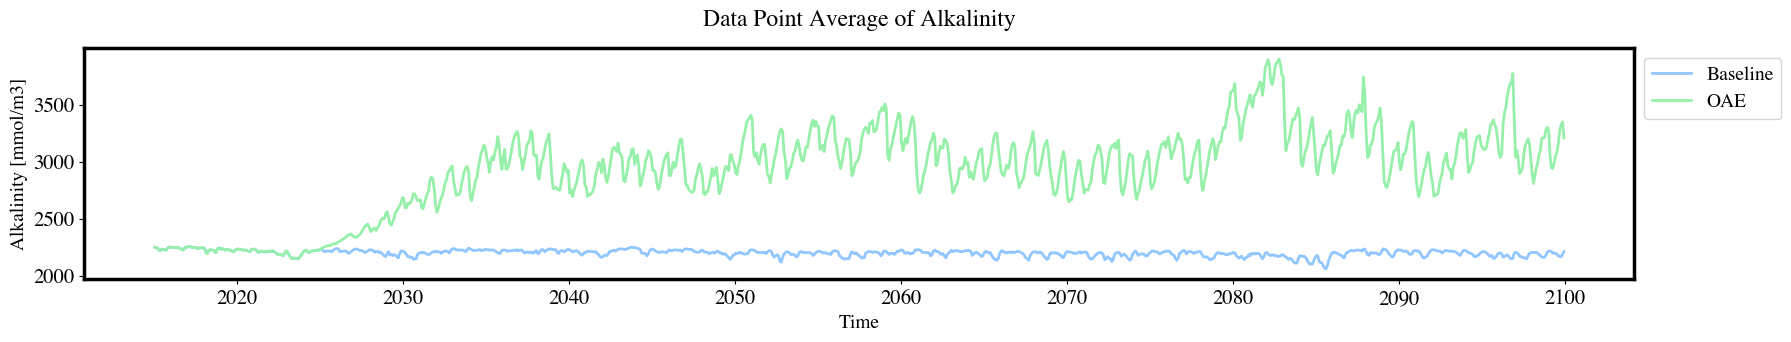

In [79]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_data_baseline_plot.time_counter, sliced_data_baseline_plot.ALK, linewidth=2, label = 'Baseline')
plt.plot(sliced_data_oae_plot.time_counter, sliced_data_oae_plot.ALK, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity [mmol/m3]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('Data Point Average of Alkalinity', fontname="Times", fontsize=17, y=1.06)
plt.show()

In [80]:
sliced_frame_baseline_plot = (sliced_frame_baseline.ALK).to_dataset(name='ALK')
sliced_frame_oae_plot = (sliced_frame_oae.ALK).to_dataset(name='ALK')

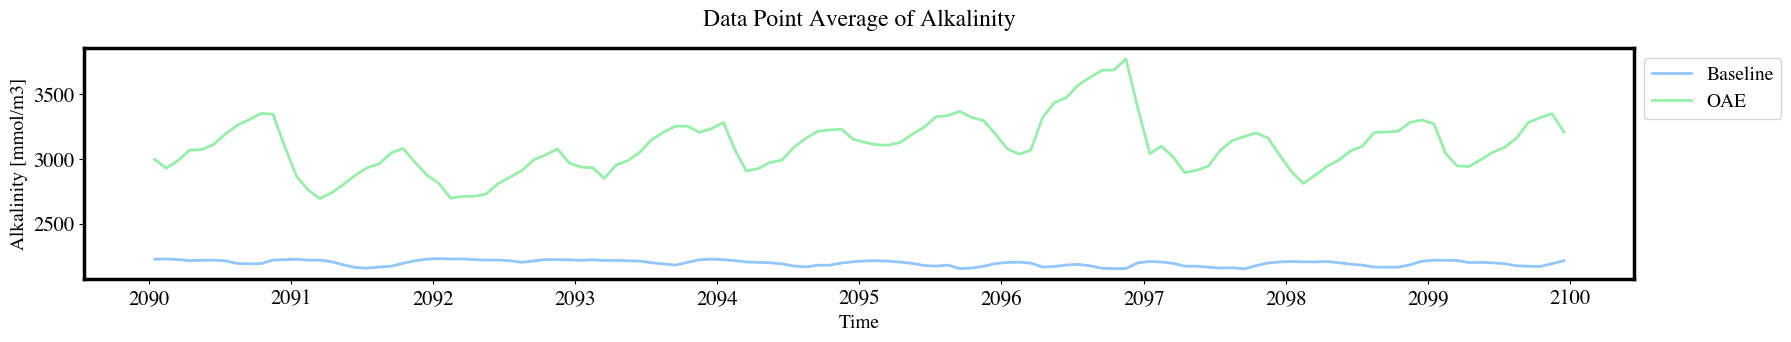

In [81]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_frame_baseline_plot.time_counter, sliced_frame_baseline_plot.ALK, linewidth=2, label = 'Baseline')
plt.plot(sliced_frame_oae_plot.time_counter, sliced_frame_oae_plot.ALK, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity [mmol/m3]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('Data Point Average of Alkalinity', fontname="Times", fontsize=17, y=1.06)
plt.show()

### Unweighted Data Point Seasonal Average of Alkalinity

In [82]:
# condition

start_date = "2090-01-01"
end_date = "2100-01-01"

In [83]:
alk_baseline = sliced_frame_baseline["ALK"].sel(time_counter=slice(start_date, end_date))

In [84]:
alk_seasonal_mean_baseline = (alk_baseline.resample(time_counter='QS-DEC').mean(keep_attrs=True))

In [85]:
alk_oae = sliced_frame_oae["ALK"].sel(time_counter=slice(start_date, end_date))

In [86]:
alk_seasonal_mean_oae = (alk_oae.resample(time_counter='QS-DEC').mean(keep_attrs=True))

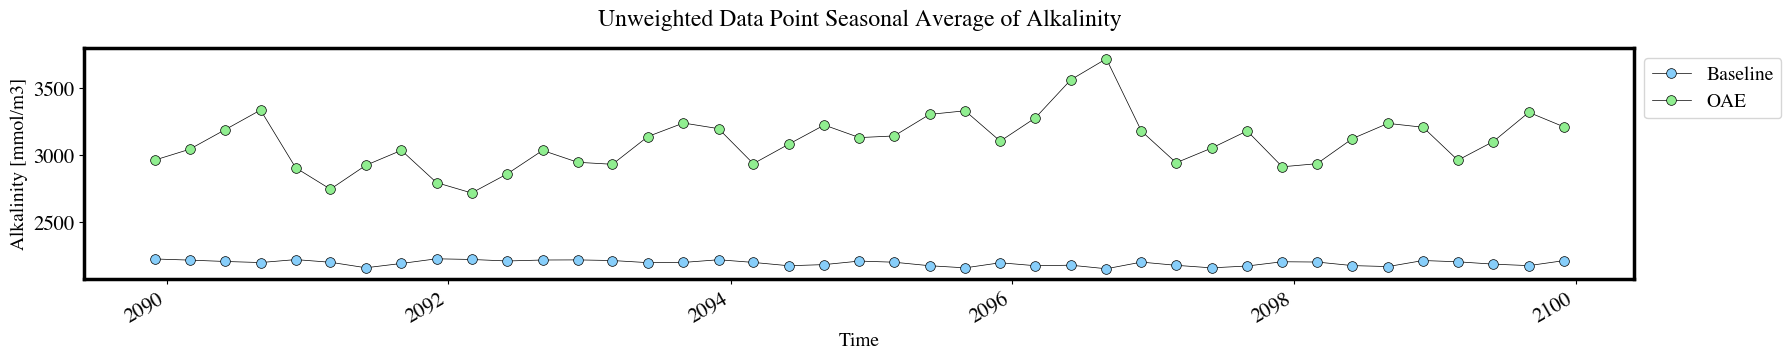

In [87]:
f, ax = plt.subplots(figsize=(20, 3))

alk_seasonal_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

alk_seasonal_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted Data Point Seasonal Average of Alkalinity", fontname="Times", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity [mmol/m3]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted Data Point Seasonal Average of Alkalinity

In [88]:
month_length_baseline = alk_baseline.time_counter.dt.days_in_month
alk_weighted_season_baseline = ((alk_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())

In [89]:
month_length_oae = alk_oae.time_counter.dt.days_in_month
alk_weighted_season_oae = ((alk_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())

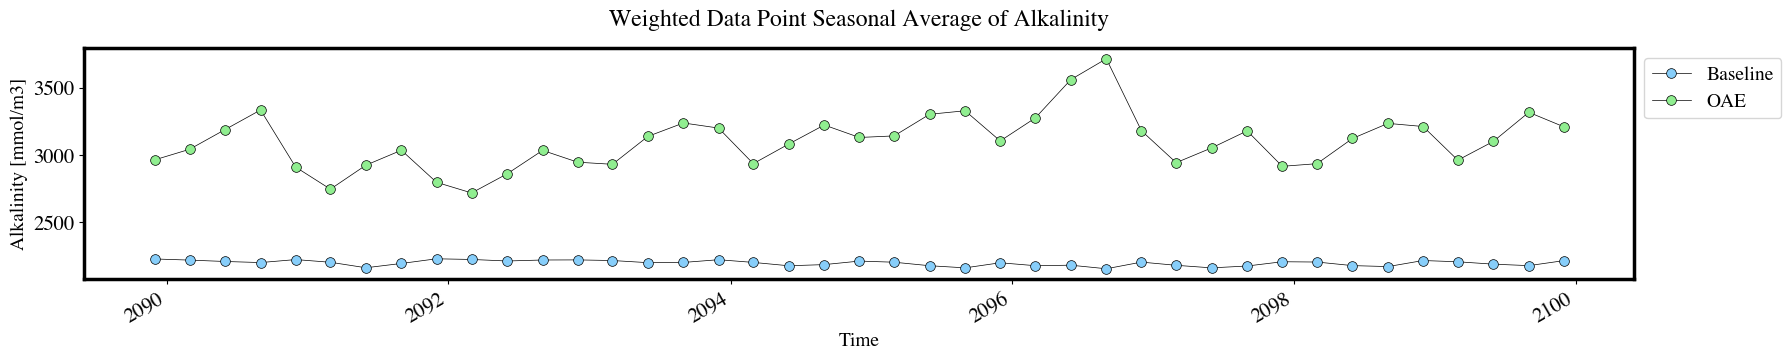

In [90]:
f, ax = plt.subplots(figsize=(20, 3))
alk_weighted_season_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

alk_weighted_season_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Weighted Data Point Seasonal Average of Alkalinity", fontname="Times", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity [mmol/m3]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted Data Point Seasonal Average of Alkalinity (seasons displayed)

In [91]:
# condition

colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

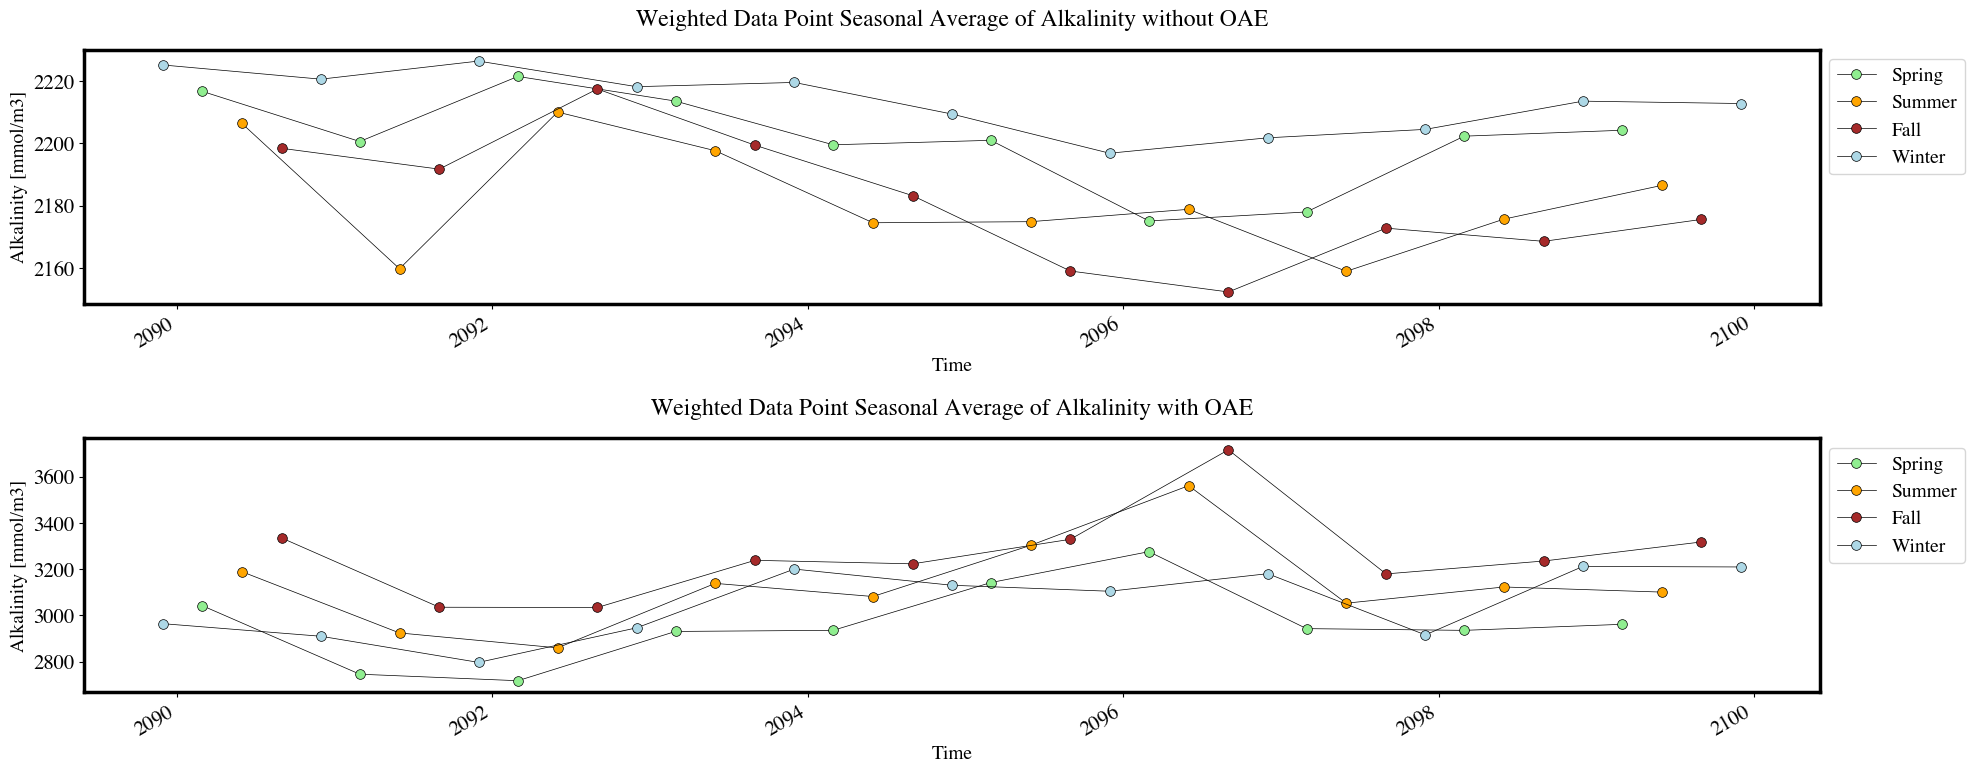

In [92]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharey=False)
for month, arr in alk_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5,
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax1.set_title("Weighted Data Point Seasonal Average of Alkalinity without OAE", fontsize=17, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Alkalinity [mmol/m3]', fontsize=14)

for month, arr in alk_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5,
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax2.set_title("Weighted Data Point Seasonal Average of Alkalinity with OAE", fontname="Times", fontsize=17, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('Alkalinity [mmol/m3]', fontsize=14)
f.tight_layout()
plt.show()

In [93]:
# define handlers for future legends

In [94]:
class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=height + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

### Weighted Data Point Seasonal Average of Alkalinity without OAE (seasons displayed)

In [95]:
alk_weighted_baseline = alk_weighted_season_baseline.to_dataframe('ALK')
alk_weighted_baseline['Month'] = pd.DatetimeIndex(alk_weighted_baseline.index).month

In [96]:
# condition

conditions_season = [
    (alk_weighted_baseline['Month'] == 3),
    (alk_weighted_baseline['Month'] == 6),
    (alk_weighted_baseline['Month'] == 9),
    (alk_weighted_baseline['Month'] == 12)
]

values_season = ['Spring', 'Summer', 'Fall', 'Winter']

In [97]:
alk_weighted_baseline['Month'] = np.select(conditions_season, values_season)

In [98]:
# condition

colors_season = dict(zip(alk_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

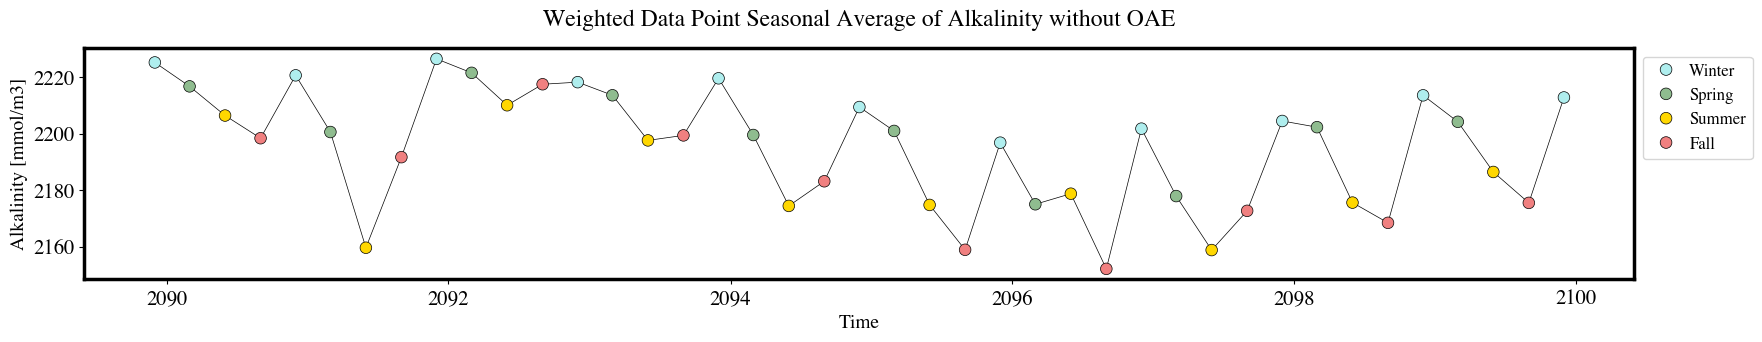

In [99]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(alk_weighted_baseline.index, alk_weighted_baseline.ALK, '-', color="black",  linewidth=0.5, markeredgewidth=0.5, zorder=1)
ax.scatter(alk_weighted_baseline.index, alk_weighted_baseline.ALK, color=alk_weighted_baseline.Month.map(lambda x: colors_season[x]), edgecolors='black',  linewidth=0.5, s=70)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_season.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=12, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity [mmol/m3]', fontsize=14)
ax.set_title("Weighted Data Point Seasonal Average of Alkalinity without OAE", fontname="Times", fontsize=17, y=1.06)

pass

### Weighted Data Point Seasonal Average of Alkalinity with OAE (seasons displayed)

In [100]:
alk_weighted_oae = alk_weighted_season_oae.to_dataframe('ALK')
alk_weighted_oae['Month'] = pd.DatetimeIndex(alk_weighted_oae.index).month

In [101]:
alk_weighted_oae['Month'] = np.select(conditions_season, values_season)

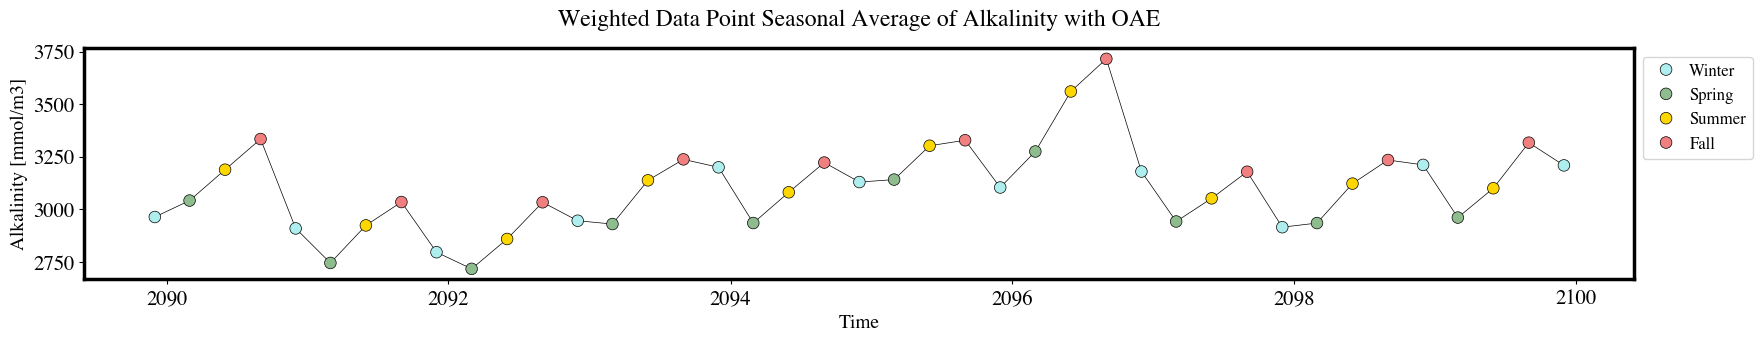

In [102]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(alk_weighted_oae.index, alk_weighted_oae.ALK, '-', color="black",  linewidth=0.5, zorder=1)
ax.scatter(alk_weighted_oae.index, alk_weighted_oae.ALK, color=alk_weighted_oae.Month.map(lambda x: colors_season[x]), edgecolors='black',  linewidth=0.5, s=70)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_season.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=12, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity [mmol/m3]', fontsize=14)
ax.set_title("Weighted Data Point Seasonal Average of Alkalinity with OAE", fontname="Times", fontsize=17, y=1.06)

pass

### Weighted Data Point Seasonal Average of Alkalinity (seasons displayed)

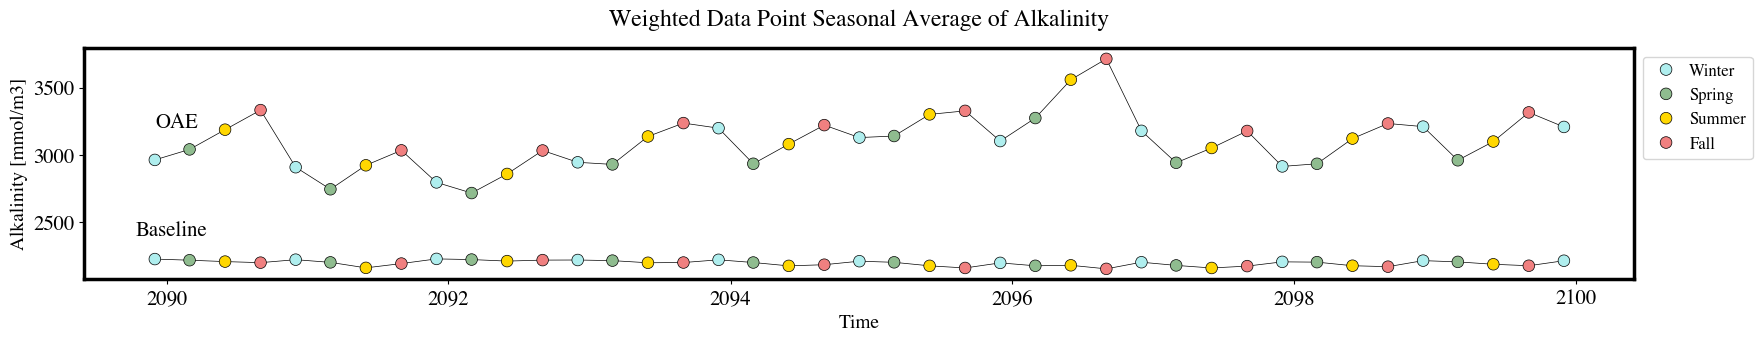

In [103]:
fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(alk_weighted_baseline.index, alk_weighted_baseline.ALK, '-', color="black",  linewidth=0.5, zorder=1)
ax.text(43750, 2400, s='Baseline')
ax.scatter(alk_weighted_baseline.index, alk_weighted_baseline.ALK, color=alk_weighted_baseline.Month.map(lambda x: colors_season[x]), marker='o', edgecolors='black',  linewidth=0.5, s=70)

ax.plot_date(alk_weighted_oae.index, alk_weighted_oae.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43800, 3200, s='OAE')
ax.scatter(alk_weighted_oae.index, alk_weighted_oae.ALK, color=alk_weighted_oae.Month.map(lambda x: colors_season[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_season.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=12, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity [mmol/m3]', fontsize=14)
ax.set_title("Weighted Data Point Seasonal Average of Alkalinity", fontname="Times", fontsize=17, y=1.06)

pass

### Data Point Monthly Average of Alkalinity without OAE

In [104]:
alk_monthly_mean_baseline = (sliced_frame_baseline["ALK"].sel(time_counter=slice(start_date, end_date)))

In [105]:
alk_monthly_mean_oae = (sliced_frame_oae["ALK"].sel(time_counter=slice(start_date, end_date)))

In [106]:
month_length_baseline = alk_monthly_mean_baseline.time_counter.dt.days_in_month
alk_weighted_season_baseline = ((alk_monthly_mean_baseline * month_length_baseline).resample(time_counter='M').sum() / month_length_baseline.resample(time_counter='M').sum())

In [107]:
month_length_oae = alk_monthly_mean_oae.time_counter.dt.days_in_month
alk_weighted_season_oae = ((alk_monthly_mean_oae * month_length_oae).resample(time_counter='M').sum() / month_length_oae.resample(time_counter='M').sum())

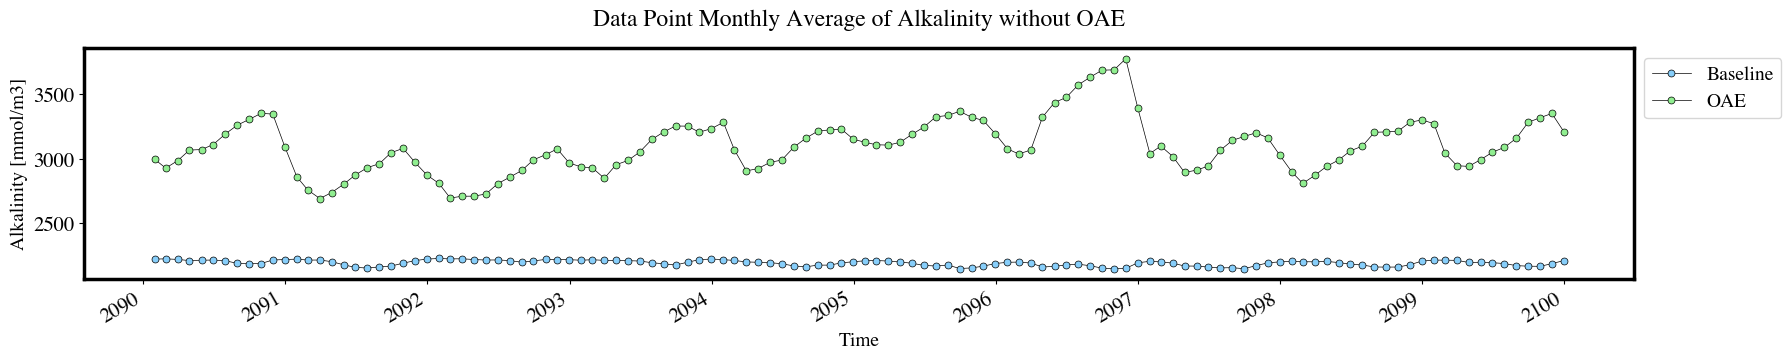

In [108]:
f, ax = plt.subplots(figsize=(20, 3))

alk_weighted_season_baseline.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

alk_weighted_season_oae.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Data Point Monthly Average of Alkalinity without OAE", fontname="Times", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity [mmol/m3]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Data Point Monthly Average of Alkalinity without OAE (months displayed)

In [109]:
alk_baseline_monthly = alk_weighted_season_baseline.to_dataframe('ALK')
alk_baseline_monthly['Month'] = pd.DatetimeIndex(alk_baseline_monthly.index).month

In [110]:
# condition

conditions_month = [
    (alk_baseline_monthly['Month'] == 1),
    (alk_baseline_monthly['Month'] == 2),
    (alk_baseline_monthly['Month'] == 3),
    (alk_baseline_monthly['Month'] == 4),
    (alk_baseline_monthly['Month'] == 5),
    (alk_baseline_monthly['Month'] == 6),
    (alk_baseline_monthly['Month'] == 7),
    (alk_baseline_monthly['Month'] == 8),
    (alk_baseline_monthly['Month'] == 9),
    (alk_baseline_monthly['Month'] == 10),
    (alk_baseline_monthly['Month'] == 11),
    (alk_baseline_monthly['Month'] == 12)
]

values_month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

In [111]:
alk_baseline_monthly['Month'] = np.select(conditions_month, values_month)

In [112]:
# condition

colors_month = dict(zip(alk_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

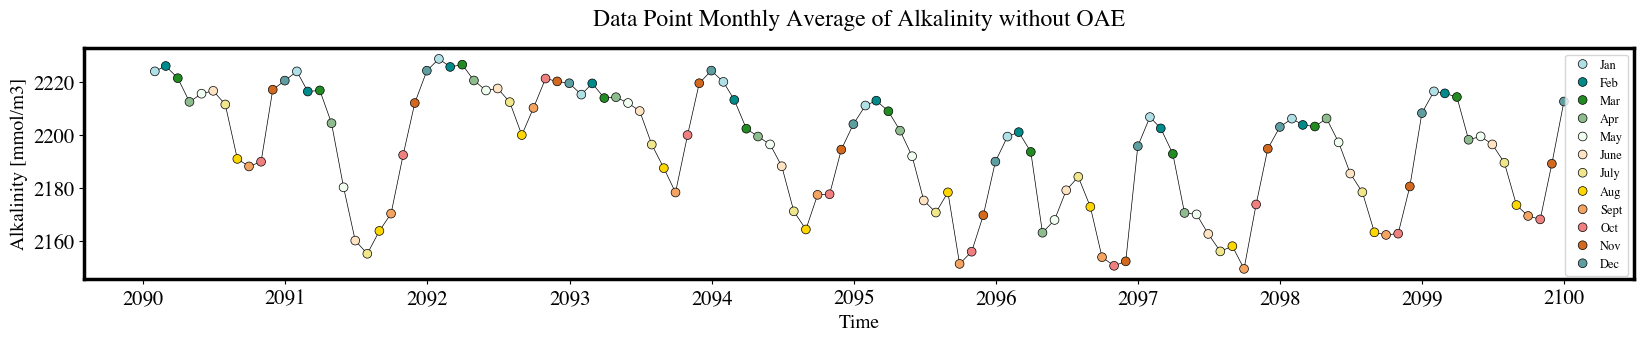

In [113]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(alk_baseline_monthly.index, alk_baseline_monthly.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(alk_baseline_monthly.index, alk_baseline_monthly.ALK, color=alk_baseline_monthly.Month.map(lambda x: colors_month[x]), edgecolors='black',  linewidth=0.5, s=40)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity [mmol/m3]', fontsize=14)
ax.set_title("Data Point Monthly Average of Alkalinity without OAE", fontname="Times", fontsize=17, y=1.06)

pass

### Data Point Monthly Average of Alkalinity with OAE (months displayed)

In [114]:
alk_oae_monthly = alk_weighted_season_oae.to_dataframe('ALK')
alk_oae_monthly['Month'] = pd.DatetimeIndex(alk_oae_monthly.index).month

In [115]:
alk_oae_monthly['Month'] = np.select(conditions_month, values_month)

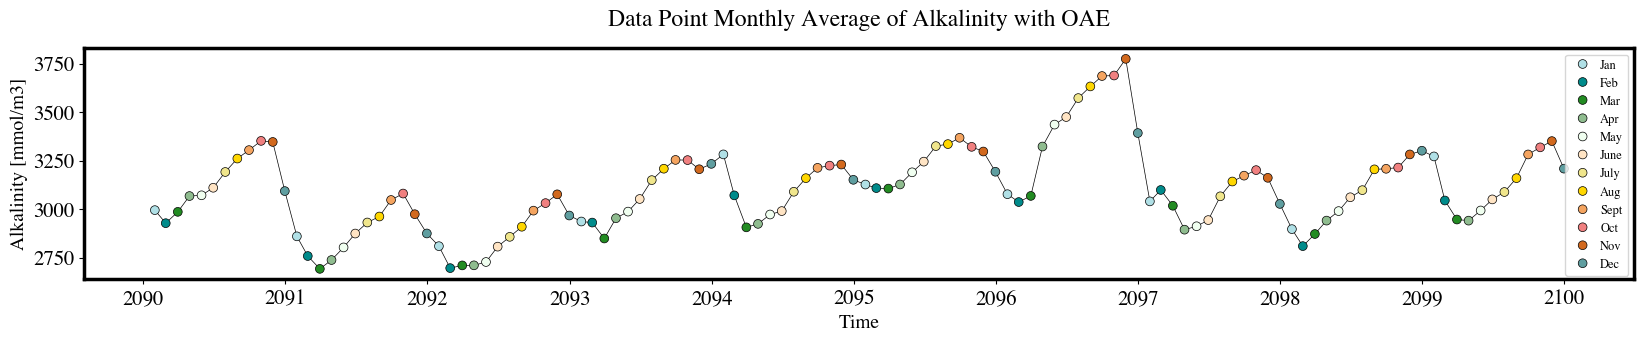

In [116]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(alk_oae_monthly.index, alk_oae_monthly.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(alk_oae_monthly.index, alk_oae_monthly.ALK, color=alk_oae_monthly.Month.map(lambda x: colors_month[x]), edgecolors='black',  linewidth=0.5, s=40)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity [mmol/m3]', fontsize=14)
ax.set_title("Data Point Monthly Average of Alkalinity with OAE", fontname="Times", fontsize=17, y=1.06)

pass

### Data Point Monthly Average of Alkalinity (months displayed)

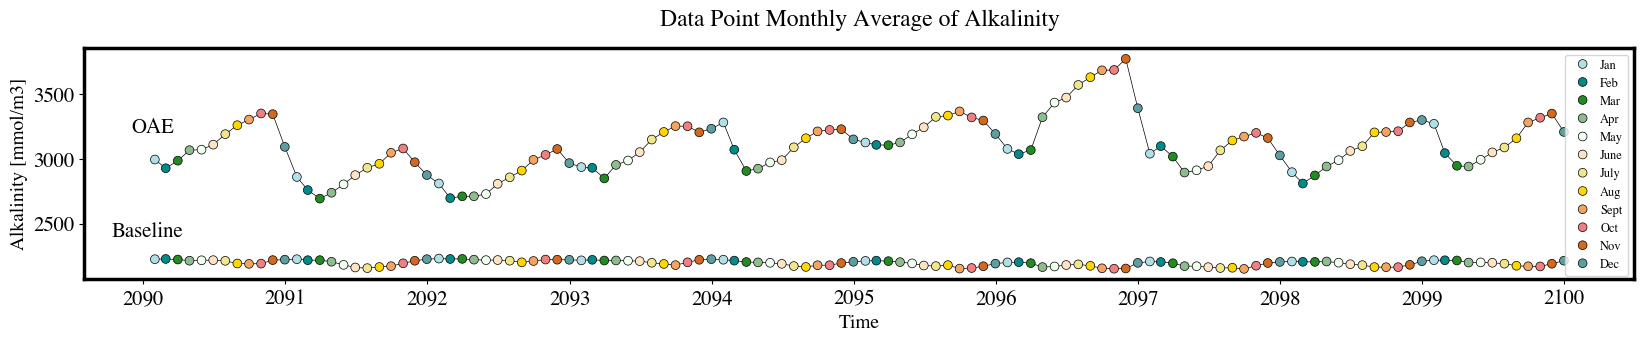

In [117]:
fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(alk_baseline_monthly.index, alk_baseline_monthly.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43750, 2400, s='Baseline')
ax.scatter(alk_baseline_monthly.index, alk_baseline_monthly.ALK, color=alk_baseline_monthly.Month.map(lambda x: colors_month[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

ax.plot_date(alk_oae_monthly.index, alk_oae_monthly.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43800, 3200, s='OAE')
ax.scatter(alk_oae_monthly.index, alk_oae_monthly.ALK, color=alk_oae_monthly.Month.map(lambda x: colors_month[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity [mmol/m3]', fontsize=14)
ax.set_title("Data Point Monthly Average of Alkalinity", fontsize=17, y=1.06)

pass

In [118]:
mean_baseline = (alk_baseline_monthly.groupby(alk_baseline_monthly.index.month).ALK.mean()).reset_index()
mean_baseline['time_counter'] = mean_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])

In [119]:
mean_oae = (alk_oae_monthly.groupby(alk_oae_monthly.index.month).ALK.mean()).reset_index()
mean_oae['time_counter']= mean_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])

In [120]:
# condition

colors_time = dict(zip(mean_baseline.time_counter.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

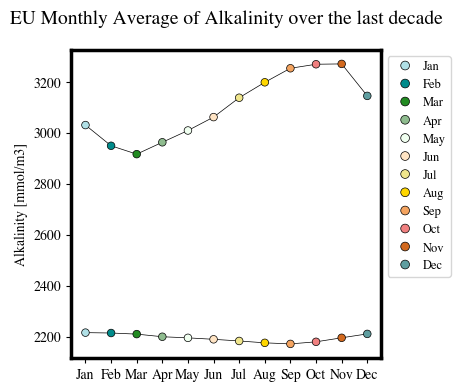

In [121]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(mean_baseline.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(mean_baseline.time_counter, mean_baseline.ALK, color=mean_baseline.time_counter.map(lambda x: colors_time[x]), edgecolors='black',  linewidth=0.5, s=30)

ax.plot(mean_oae.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(mean_oae.time_counter, mean_oae.ALK, color=mean_oae.time_counter.map(lambda x: colors_time[x]), edgecolors='black',  linewidth=0.5, s=30)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_time.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})
ax.set_ylabel('Alkalinity [mmol/m3]', fontsize=10)

ax.tick_params(axis='both', which='major', labelsize=10)
ax.yaxis.get_offset_text().set_fontsize(10)

ax.set_title("EU Monthly Average of Alkalinity over the last decade", fontname="Times", fontsize=14, y=1.06)

pass

### Δ Alkalinity between Baseline and OAE scenario

In [122]:
delta_alk = (alk_oae_monthly.ALK - alk_baseline_monthly.ALK).to_xarray()

In [123]:
delta_alk = delta_alk.to_dataframe('ALK')
delta_alk['Month'] = pd.DatetimeIndex(delta_alk.index).month

In [124]:
delta_alk['Month'] = np.select(conditions_month, values_month)

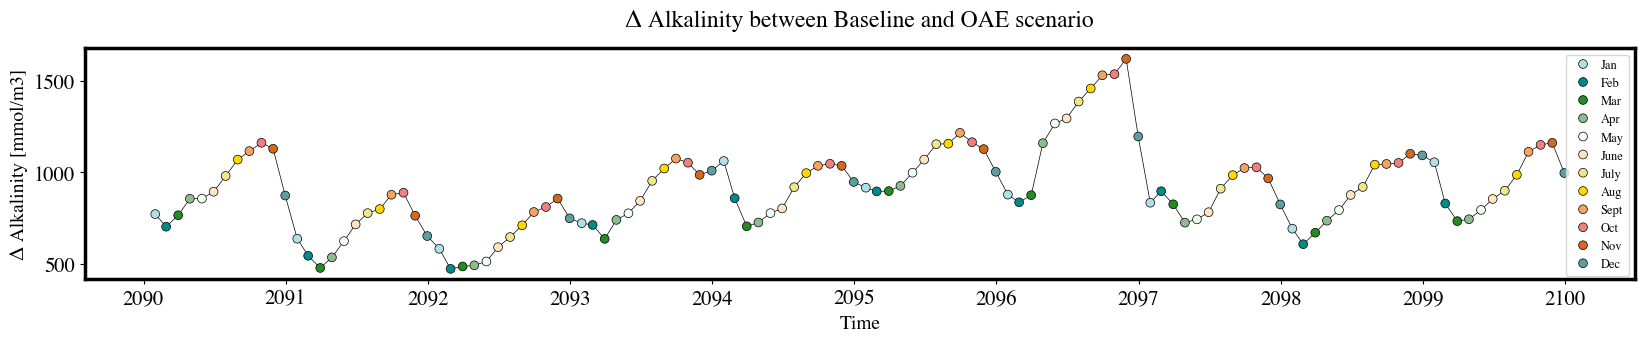

In [125]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(delta_alk.index, delta_alk.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(delta_alk.index, delta_alk.ALK, color=delta_alk.Month.map(lambda x: colors_month[x]), edgecolors='black',  linewidth=0.5, s=40)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Δ Alkalinity [mmol/m3]', fontsize=14)
ax.set_title("Δ Alkalinity between Baseline and OAE scenario", fontname="Times", fontsize=17, y=1.06)

pass

### Averaged monthly cycle of Δ Alkalinity

In [126]:
delta_alk_mean = (delta_alk.groupby(delta_alk.index.month).ALK.mean()).reset_index()
delta_alk_mean['time_counter'] = delta_alk_mean['time_counter'].apply(lambda x: calendar.month_abbr[x])

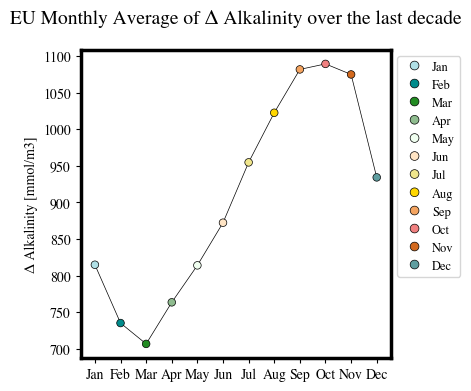

In [127]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(delta_alk_mean.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(delta_alk_mean.time_counter, delta_alk_mean.ALK, color=delta_alk_mean.time_counter.map(lambda x: colors_time[x]), edgecolors='black',  linewidth=0.5, s=30)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_time.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_ylabel('Δ Alkalinity [mmol/m3]', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_title("EU Monthly Average of Δ Alkalinity over the last decade", fontname="Times", fontsize=14, y=1.06)

pass

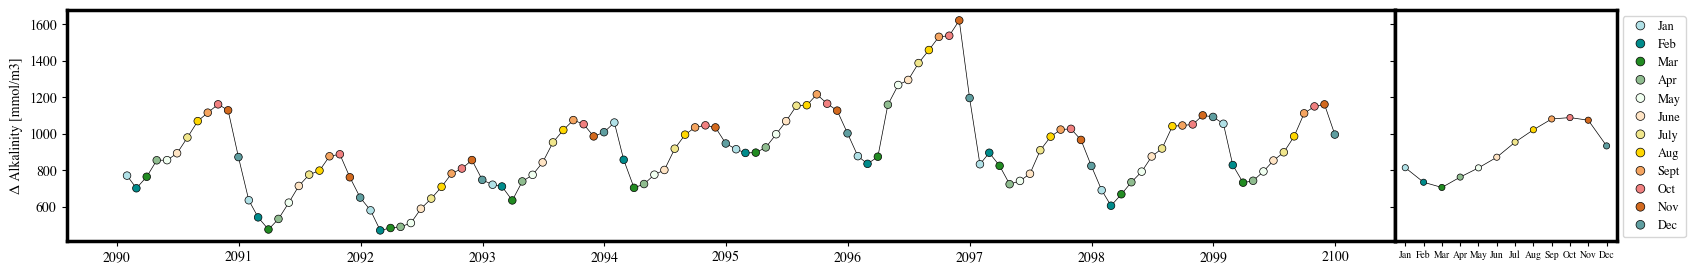

In [128]:
f, (ax, ax2) = plt.subplots(1,2, figsize=(20, 3), gridspec_kw={'width_ratios': [6, 1]}, sharey=True) 
plt.subplots_adjust(wspace=0, hspace=0)

ax.plot_date(delta_alk.index, delta_alk.ALK, '-', label='Baseline', color="black", linewidth=0.5, zorder=0.8)
ax.scatter(delta_alk.index, delta_alk.ALK, color=delta_alk.Month.map(lambda x: colors_month[x]), marker='o', edgecolors='black', linewidth=0.5, s=30)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month.items()]
ax2.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_ylabel('Δ Alkalinity [mmol/m3]', fontsize=10)

ax2.plot(delta_alk_mean.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax2.scatter(delta_alk_mean.time_counter, delta_alk_mean.ALK, color=delta_alk_mean.time_counter.map(lambda x: colors_time[x]), edgecolors='black',  linewidth=0.5, s=20)

ax2.tick_params(axis='x', which='major', labelsize=7)

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP3_7.0/Alkalinity/figs/DPAlk_change_monthly_mean.png')

pass

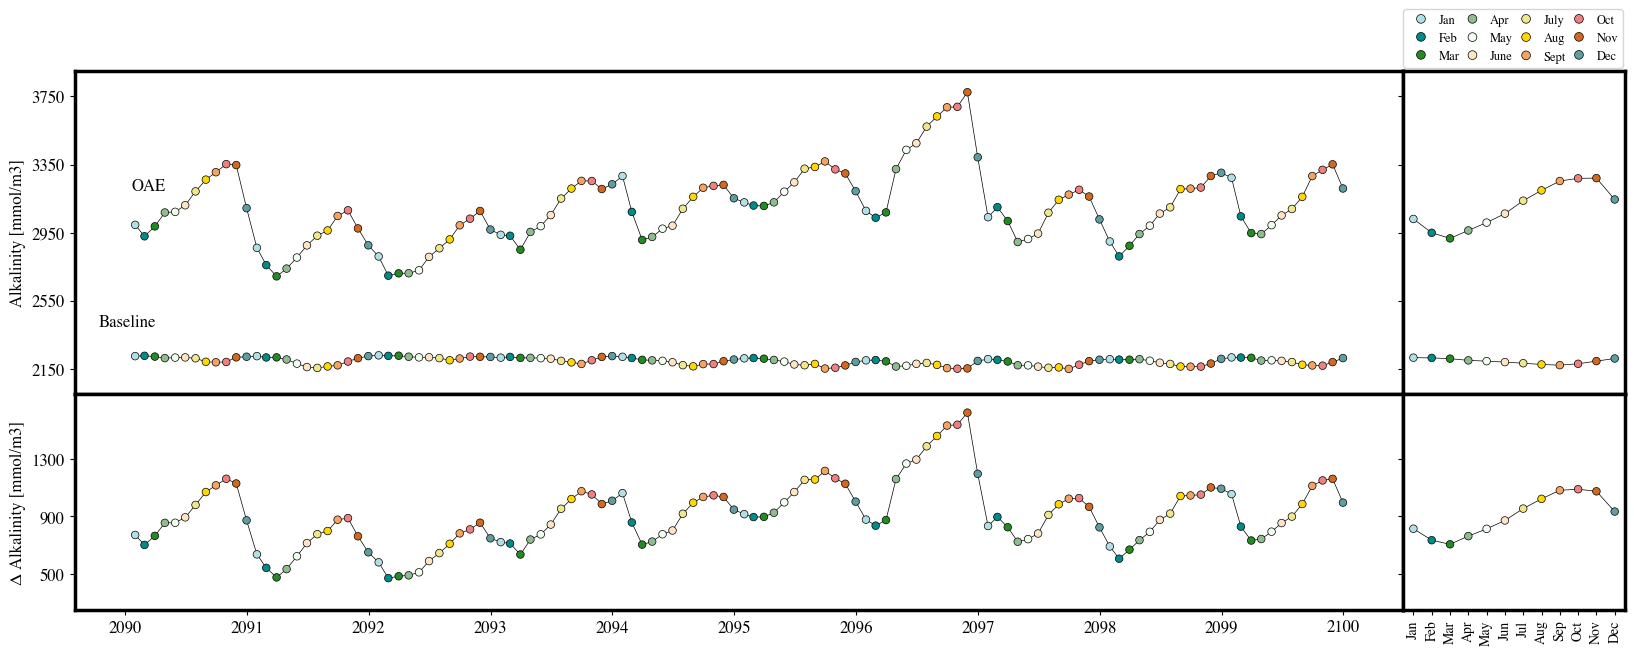

In [129]:
f, ((ax, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20, 7), gridspec_kw={'width_ratios': [6, 1], 'height_ratios': [3, 2]}, sharey='row') 
plt.subplots_adjust(wspace=0, hspace=0)

ax.plot_date(alk_baseline_monthly.index, alk_baseline_monthly.ALK, '-', label='Baseline', color="black", linewidth=0.5, zorder=0.8)
ax.text(43750, 2400, s='Baseline', fontsize=12)
ax.scatter(alk_baseline_monthly.index, alk_baseline_monthly.ALK, color=alk_baseline_monthly.Month.map(lambda x: colors_month[x]), marker='o', edgecolors='black', linewidth=0.5, s=30)

ax.plot_date(alk_oae_monthly.index, alk_oae_monthly.ALK, '-', label='OAE', color="black", linewidth=0.5, zorder=1)
ax.text(43850, 3200, s='OAE', fontsize=12)
ax.scatter(alk_oae_monthly.index, alk_oae_monthly.ALK, color=alk_oae_monthly.Month.map(lambda x: colors_month[x]), marker='o', edgecolors='black', linewidth=0.5, s=30)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylabel('Alkalinity [mmol/m3]', fontsize=12)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month.items()]
ax.legend(handles = legend, bbox_to_anchor=(1.17, 1.21), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 4, handler_map={mpatches.Circle: HandlerEllipse()})

ax2.plot(mean_baseline.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax2.scatter(mean_baseline.time_counter, mean_baseline.ALK, color=mean_baseline.time_counter.map(lambda x: colors_time[x]), edgecolors='black',  linewidth=0.5, s=30)

ax2.plot(mean_oae.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax2.scatter(mean_oae.time_counter, mean_oae.ALK, color=mean_oae.time_counter.map(lambda x: colors_time[x]), edgecolors='black',  linewidth=0.5, s=30)

ax2.tick_params(axis='x', which='major', labelsize=7)
ax2.tick_params(axis='y', which='major', labelsize=12)

ax3.plot_date(delta_alk.index, delta_alk.ALK, '-', label='Baseline', color="black", linewidth=0.5, zorder=0.8)
ax3.scatter(delta_alk.index, delta_alk.ALK, color=delta_alk.Month.map(lambda x: colors_month[x]), marker='o', edgecolors='black', linewidth=0.5, s=30)

ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.set_ylabel('Δ Alkalinity [mmol/m3]', fontsize=12)

ax4.plot(delta_alk_mean.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax4.scatter(delta_alk_mean.time_counter, delta_alk_mean.ALK, color=delta_alk_mean.time_counter.map(lambda x: colors_time[x]), edgecolors='black',  linewidth=0.5, s=30)

ax4.tick_params(axis='x', which='major', labelsize=10, rotation=90)
ax4.tick_params(axis='y', which='major', labelsize=12)

start, end = ax.set_ylim(2000, 3900)
ax.yaxis.set_ticks(np.arange(start+150, end-100, 400))

start3, end3 = ax3.set_ylim(250, 1750)
ax3.yaxis.set_ticks(np.arange(start3+250, end3-100, 400))

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP3_7.0/Alkalinity/figs/DPAlk_monthly_mean.png')

pass

In [130]:
summary_amplitude = pd.read_csv(r'/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP3_7.0/Summary_amplitude.csv', header=[0,1], index_col=0)

In [131]:
summary_amplitude.loc['Alkalinity', ('Location Point','With OAE')] = round(mean_oae.ALK.max() - mean_oae.ALK.min())

In [132]:
summary_amplitude.loc['Alkalinity', ('Location Point','Without OAE')] = round(mean_baseline.ALK.max() - mean_baseline.ALK.min())

In [133]:
summary_amplitude.to_csv('../Summary_amplitude.csv')

In [134]:
header_mm = [np.array(['Without OAE','Without OAE', 'With OAE', 'With OAE']), 
np.array(['Max', 'Min', 'Max', 'Min',])] 
summary_maxmin = pd.DataFrame(index=['Alkalinity', 'CO2 flux', 'fCO2', 'DIC', 'pH'], columns = header_mm)
summary_maxmin.index.name = 'Variables'

In [135]:
summary_maxmin.loc['Alkalinity', ('Without OAE','Max')] = round(mean_baseline.ALK.max())
summary_maxmin.loc['Alkalinity', ('Without OAE','Min')] = round(mean_baseline.ALK.min())

In [136]:
summary_maxmin.loc['Alkalinity', ('With OAE','Max')] = round(mean_oae.ALK.max())
summary_maxmin.loc['Alkalinity', ('With OAE','Min')] = round(mean_oae.ALK.min())

In [137]:
summary_maxmin.to_csv('../Summary_minmax_dp.csv')

In [139]:
print(summary_amplitude.style.to_latex())

\begin{tabular}{lrrrr}
{} & \multicolumn{2}{r}{European Average} & \multicolumn{2}{r}{Location Point} \\
{} & {Without OAE} & {With OAE} & {Without OAE} & {With OAE} \\
{variables} & {} & {} & {} & {} \\
Alkalinity & 13.000000 & 6.000000 & 44.000000 & 354.000000 \\
CO2 flux & 4.340000 & 6.380000 & 9.240000 & 28.260000 \\
fCO2 & 73.000000 & 55.000000 & 207.000000 & 112.000000 \\
DIC & 27.000000 & 17.000000 & 74.000000 & 136.000000 \\
pH & 0.030000 & 0.018000 & 0.099000 & 0.160000 \\
\end{tabular}

